# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 611


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | carbonear
Processing Record 2 of Set 1 | al mazar al janubi
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | port elizabeth
Processing Record 5 of Set 1 | yellowknife
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | poronaysk
Processing Record 9 of Set 1 | haiku-pauwela
Processing Record 10 of Set 1 | olonkinbyen
Processing Record 11 of Set 1 | yeniseysk
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | hithadhoo
Processing Record 14 of Set 1 | edinburgh of the seven seas
Processing Record 15 of Set 1 | bandar-e lengeh
Processing Record 16 of Set 1 | dudinka
Processing Record 17 of Set 1 | puerto natales
Processing Record 18 of Set 1 | iskateley
Processing Record 19 of Set 1 | badger
Processing Record 20 of Set 1 | invercargill
Processing Record 21 of Set 1 | blackmans bay
Processing Record 

Processing Record 40 of Set 4 | cidreira
Processing Record 41 of Set 4 | vingt cinq
City not found. Skipping...
Processing Record 42 of Set 4 | bandon
Processing Record 43 of Set 4 | xai-xai
Processing Record 44 of Set 4 | t'ongch'on-up
Processing Record 45 of Set 4 | ciudad bolivar
Processing Record 46 of Set 4 | kalawit
Processing Record 47 of Set 4 | toormina
Processing Record 48 of Set 4 | mossel bay
Processing Record 49 of Set 4 | fisterra
Processing Record 0 of Set 5 | greenville
Processing Record 1 of Set 5 | axim
Processing Record 2 of Set 5 | sitka
Processing Record 3 of Set 5 | fukuecho
Processing Record 4 of Set 5 | hami
Processing Record 5 of Set 5 | barentu
Processing Record 6 of Set 5 | changyon
Processing Record 7 of Set 5 | kavaratti
Processing Record 8 of Set 5 | vilyuchinsk
Processing Record 9 of Set 5 | avarua
Processing Record 10 of Set 5 | maceio
Processing Record 11 of Set 5 | margate
Processing Record 12 of Set 5 | togur
Processing Record 13 of Set 5 | port mathu

Processing Record 33 of Set 8 | chibougamau
Processing Record 34 of Set 8 | quitilipi
Processing Record 35 of Set 8 | deqing
Processing Record 36 of Set 8 | trenggalek
Processing Record 37 of Set 8 | hotan
Processing Record 38 of Set 8 | banda aceh
Processing Record 39 of Set 8 | iskandar
Processing Record 40 of Set 8 | puan
Processing Record 41 of Set 8 | nanao
Processing Record 42 of Set 8 | weno
Processing Record 43 of Set 8 | lebu
Processing Record 44 of Set 8 | mount pearl
Processing Record 45 of Set 8 | mahina
Processing Record 46 of Set 8 | ciechocinek
Processing Record 47 of Set 8 | rundu
Processing Record 48 of Set 8 | shizunai-furukawacho
Processing Record 49 of Set 8 | adrar
Processing Record 0 of Set 9 | labrador city
Processing Record 1 of Set 9 | villarrobledo
Processing Record 2 of Set 9 | monte argentario
Processing Record 3 of Set 9 | mil'kovo
Processing Record 4 of Set 9 | shatrovo
Processing Record 5 of Set 9 | jinchang
Processing Record 6 of Set 9 | bologoye-4
City 

Processing Record 24 of Set 12 | waat
Processing Record 25 of Set 12 | shingu
Processing Record 26 of Set 12 | sarh
Processing Record 27 of Set 12 | mola di bari
Processing Record 28 of Set 12 | elmina
Processing Record 29 of Set 12 | perelyub
Processing Record 30 of Set 12 | laibin
Processing Record 31 of Set 12 | hoxtolgay
City not found. Skipping...
Processing Record 32 of Set 12 | weining
Processing Record 33 of Set 12 | kembe
Processing Record 34 of Set 12 | sarkand
Processing Record 35 of Set 12 | verkhnevilyuysk
Processing Record 36 of Set 12 | wenshui
Processing Record 37 of Set 12 | santana
Processing Record 38 of Set 12 | presque isle
Processing Record 39 of Set 12 | dhromolaxia
Processing Record 40 of Set 12 | nizhneudinsk
Processing Record 41 of Set 12 | las khorey
Processing Record 42 of Set 12 | tostado
Processing Record 43 of Set 12 | irkutsk
Processing Record 44 of Set 12 | yuzhno-kurilsk
Processing Record 45 of Set 12 | abepura
Processing Record 46 of Set 12 | naze
Pro

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          588
Lat           588
Lng           588
Max Temp      588
Humidity      588
Cloudiness    588
Wind Speed    588
Country       588
Date          588
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,carbonear,47.7332,-53.2148,42.42,85,100,15.95,CA,1684145952
1,al mazar al janubi,31.0656,35.6961,77.05,16,69,1.01,JO,1684145952
2,adamstown,-25.0660,-130.1015,72.39,91,100,33.11,PN,1684145952
3,port elizabeth,-33.9180,25.5701,67.32,62,40,6.91,ZA,1684145952
4,yellowknife,62.4560,-114.3525,51.91,55,18,5.75,CA,1684145673


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,carbonear,47.7332,-53.2148,42.42,85,100,15.95,CA,1684145952
1,al mazar al janubi,31.0656,35.6961,77.05,16,69,1.01,JO,1684145952
2,adamstown,-25.0660,-130.1015,72.39,91,100,33.11,PN,1684145952
3,port elizabeth,-33.9180,25.5701,67.32,62,40,6.91,ZA,1684145952
4,yellowknife,62.4560,-114.3525,51.91,55,18,5.75,CA,1684145673


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

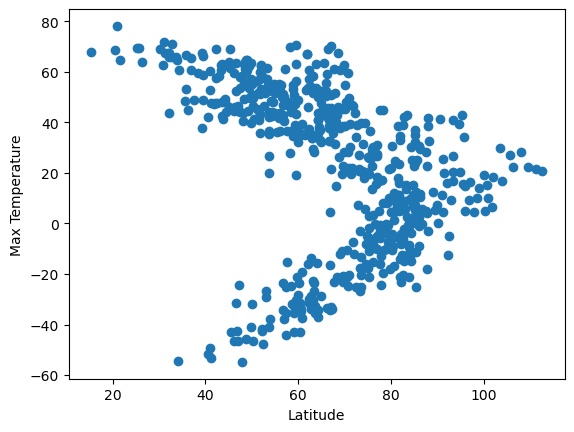

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Max Temp"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

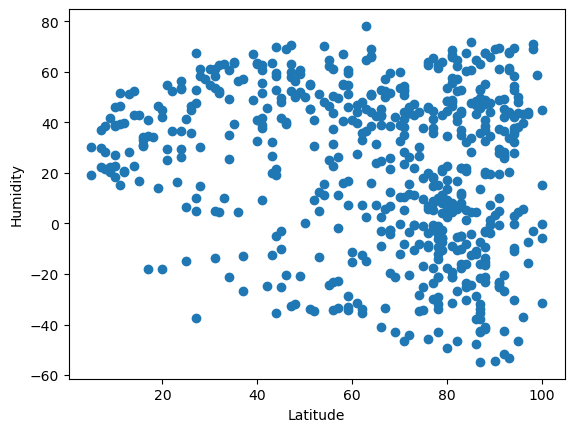

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Humidity"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

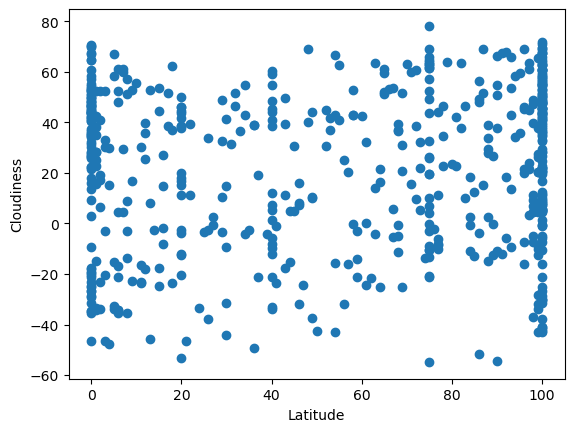

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Cloudiness"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

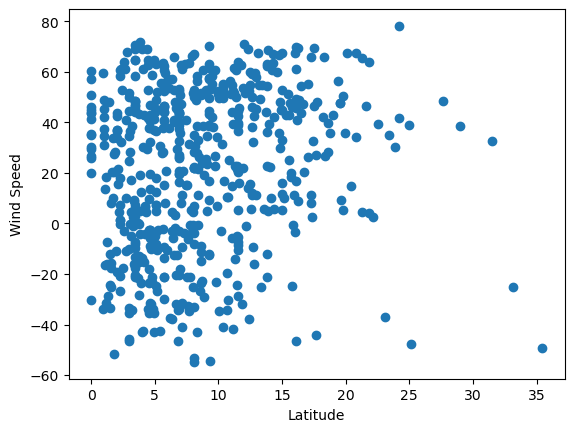

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Wind Speed"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Create a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title,text_coordinates):
    
    # Run regression on Southern Hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Title")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,carbonear,47.7332,-53.2148,42.42,85,100,15.95,CA,1684145952
1,al mazar al janubi,31.0656,35.6961,77.05,16,69,1.01,JO,1684145952
4,yellowknife,62.4560,-114.3525,51.91,55,18,5.75,CA,1684145673
6,albany,42.6001,-73.9662,43.65,82,1,1.99,US,1684145953
7,poronaysk,49.2167,143.1167,44.22,92,86,13.29,RU,1684145915


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,adamstown,-25.0660,-130.1015,72.39,91,100,33.11,PN,1684145952
3,port elizabeth,-33.9180,25.5701,67.32,62,40,6.91,ZA,1684145952
5,waitangi,-43.9535,-176.5597,57.27,72,30,17.67,NZ,1684145953
11,grytviken,-54.2811,-36.5092,34.12,90,90,9.33,GS,1684145903
12,hithadhoo,-0.6000,73.0833,83.68,77,100,15.88,MV,1684145954


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.762392179383905


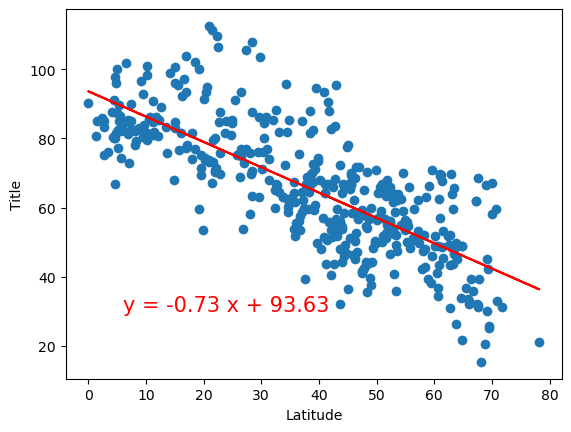

In [15]:
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (6,30))

The r-squared is: 0.8475320925332911


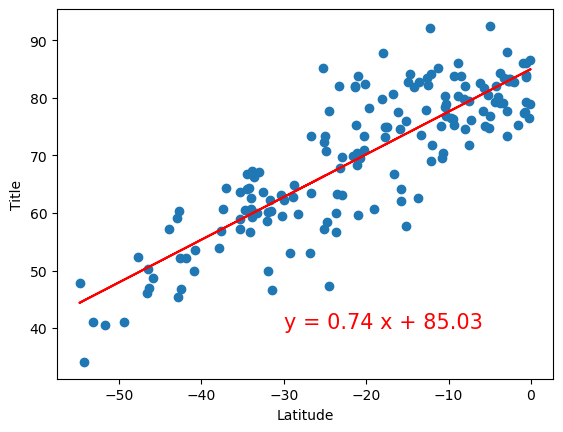

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (-30,40))

### Relationship between Temperature and Latitude:
 
 --There is a fairly strong negative correlation between temperature and latitude with a correlation coefficient of -0.762392179383905 on Northern Hemisphere.
 
 --There is a relatively strong positive correlation between temperature and latitude with a correlation coefficient of 0.8475320925332911 on Southern Hemisphere.

### Humidity vs. Latitude Linear Regression 

The r-squared is: -0.029286222732769287


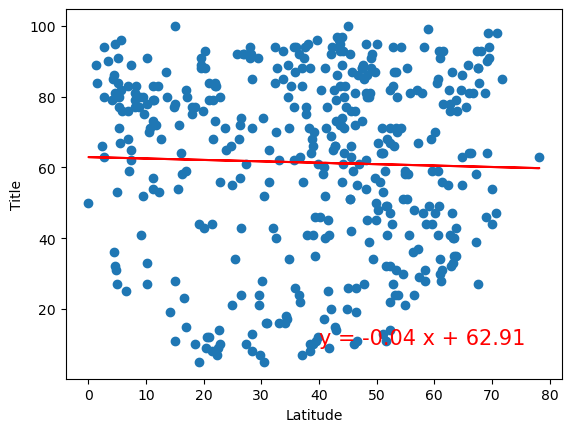

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (40,10))

The r-squared is: -0.006675632390811852


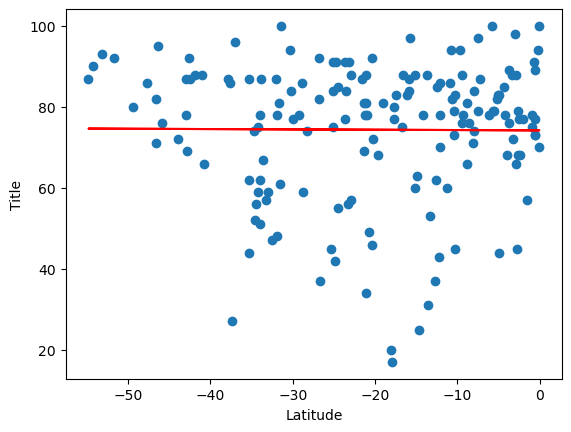

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (-30,150))

### Relationship between Humidity and Latitude:

-There is a relatively negative correlation between humidity and latitude with a correlation coefficient of -0.029286222732769287 on Northern Hemisphere.

-There is a relatively positive correlation correlation between humidity and latitude with a correlation coefficient of -0.006675632390811852 on Southern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.00022747441979015066


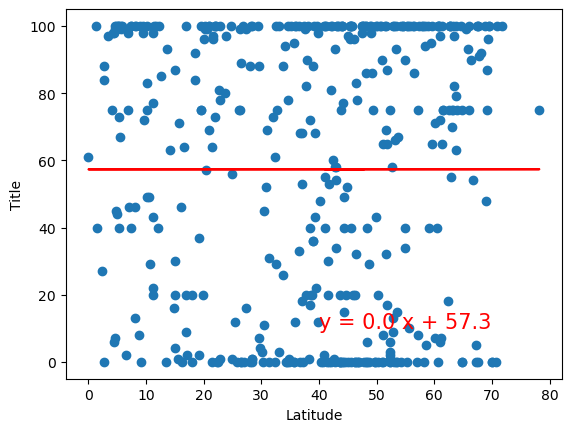

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (40,10))

The r-squared is: 0.14908490616060957


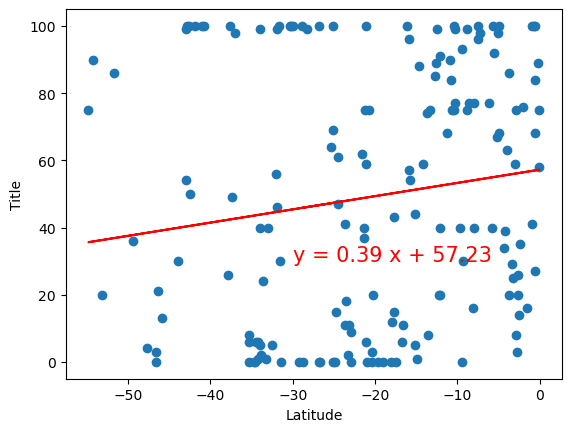

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (-30,30))

### Relationship between Cloudiness and Latitude:

There is a weak positive correlation between cloudiness and latitude with a correlation coefficient of 0.00022747441979015066 on Northern Hemisphere.

There is a relatively strong positive correlation between cloudiness and latitude with a correlation coefficient of 0.14908490616060957 on Southern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.06973419724230433


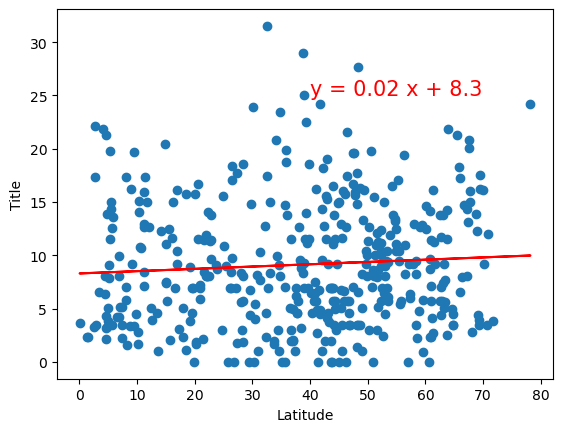

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (40,25))

The r-squared is: -0.17141087745123978


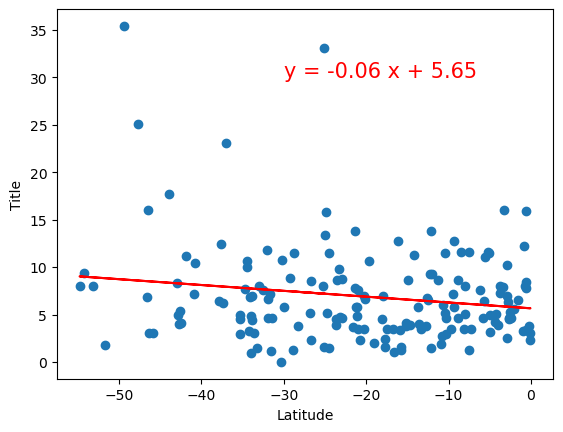

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (-30,30))

### Relationship between Wind Speed and Latitude:

There is a positive correlation between wind speed and latitude with a correlation coefficient of  0.06973419724230433 on Northern Hemisphere.

There is a weak positive correlation between wind speed and latitude with a correlation coefficient of -0.17141087745123978 on Southern Hemisphere.